### Exercise 7.02 : Building the generator network

In [10]:
# Importing the library packages
import tensorflow as tf
import numpy as np
from numpy.random import randn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

In [11]:
# Define the input features and output features
infeats = 10
outfeats = 2


In [12]:
# Generate a batch of random numbers
batch = 128

genInput = randn(infeats * batch)

In [13]:
# Reshape the data 
genInput = genInput.reshape(batch,infeats)

print(genInput.shape)

(128, 10)


In [14]:
# Defining the Generator model
Genmodel = Sequential()
Genmodel.add(Dense(32,activation = 'linear',kernel_initializer='he_uniform',input_dim=infeats))
Genmodel.add(Dense(32,activation = 'relu',kernel_initializer='he_uniform'))    
Genmodel.add(Dense(64,activation = 'elu',kernel_initializer='he_uniform'))    
Genmodel.add(Dense(32,activation = 'elu',kernel_initializer='he_uniform'))    
Genmodel.add(Dense(32,activation = 'selu',kernel_initializer='he_uniform'))
Genmodel.add(Dense(outfeats,activation = 'selu'))

In [15]:
# Defining the summary of the network

Genmodel.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 6,722
Trainable params: 6,722
Non-trainable params: 0
____________________________________________________

In [16]:
# Generating fake samples from network

fakeSamps = Genmodel.predict(genInput)

fakeSamps.shape

(128, 2)

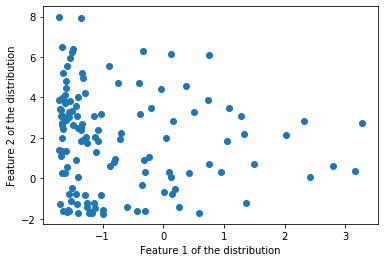

In [17]:
# Plotting the fake distribution
from matplotlib import pyplot
pyplot.scatter(fakeSamps[:,0],fakeSamps[:,1])
pyplot.xlabel('Feature 1 of the distribution')
pyplot.ylabel('Feature 2 of the distribution')
pyplot.show()